# Loading packages

In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from pandas.api.types import CategoricalDtype

# Loading data

### Data with PT contrast changes of mind

In [18]:
data= pd.read_pickle("../output/pt_replication_modified_exclusions_data_CoM.pkl")

In [19]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,Contrast_3_7,Contrast_4_8,Contrast_5_9,Contrast_6_10,Contrast_16_17,Contrast_4_11,Contrast_5_6,Contrast_9_10,Contrast_12_13,Contrast_14_15
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,PT,PT,EUT + PT,EUT + PT,EUT + PT,PT,EUT + PT,EUT + PT,EUT + PT,EUT + PT
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,EUT + PT,EUT + PT,PT,EUT + PT,PT,EUT + PT,EUT + PT,PT,EUT + PT,PT
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,PT,EUT + PT,EUT + PT,EUT + PT,Neither,EUT + PT,EUT + PT,EUT + PT,EUT + PT,PT
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,PT,EUT + PT,PT,EUT + PT,EUT + PT,EUT + PT,EUT + PT,PT,PT,PT
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,PT,Neither,PT,EUT + PT,EUT + PT,EUT + PT,PT,EUT + PT,EUT + PT,PT


### PT contrast changes of mind table

In [20]:
contrast_table = pd.read_excel("../output/contrast_changes_of_mind.xlsx")

In [24]:
contrast_table.head()

,Effect,EUT + PT,Neither,PT
0,Contrast_14_15,43.699871,7.089263,49.210867
1,Contrast_12_13,47.657394,8.272328,44.070278
2,Contrast_9_10,47.730600,7.808687,44.460713
3,Contrast_5_6,39.580283,2.879453,57.540264
4,Contrast_4_11,53.757931,5.563690,40.678380


In [27]:
contrast_columns = contrast_table["Effect"].values[::-1]

### Proportion A by country

In [8]:
long_data = pd.read_csv("../output/proportions_by_country.csv")

In [9]:
long_data.head()

,Country,Item,Proportion,Succesful Replication,Sample Size
0,Australia,1,0.446809,No,282
1,Austria,1,0.198198,Yes,111
2,Belgium,1,0.192708,Yes,192
3,Bulgaria,1,0.181102,Yes,127
4,Chile,1,0.186207,Yes,145


### Meta analytic proportions

In [14]:
prop_df = pd.read_excel("../output/Meta analysis proportions.xlsx", index=False)

In [15]:
prop_df.loc[7, "Succesful Replication"] = "NA"

In [16]:
prop_df.head()

,prop,lb,ub,p-value,Item,Succesful Replication
0,0.241358,0.211271,0.274240,6.539007e-39,1,Yes
1,0.614820,0.586543,0.642342,7.730740e-15,2,Yes
2,0.123918,0.106135,0.144201,2.377183e-106,3,Yes
3,0.509695,0.478994,0.540324,5.360876e-01,4,No
4,0.102886,0.082922,0.126991,2.691424e-71,5,Yes


# Supplementary Analyses

# Choice proportions as a function of the magnitude of the reference value

In [6]:
reference_magnitude_table = pd.read_excel("../data/reference_value_by_country.xlsx")

In [7]:
reference_magnitude_dict = reference_magnitude_table.set_index("Country")["Reference Number"].to_dict()

In [10]:
long_data["Reference Magnitude"] = long_data["Country"].map(reference_magnitude_dict )

In [11]:
long_data["Reference Magnitude"] = long_data["Reference Magnitude"].astype(float)

In [12]:
long_data["Log Reference Magnitude"] = np.log(long_data["Reference Magnitude"])

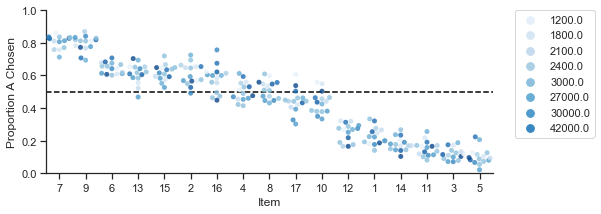

In [17]:
sns.set(font_scale=1, style="ticks")
fig, ax = plt.subplots(figsize=(8, 3))
sns.swarmplot(x="Item", y="Proportion", data=long_data, hue="Reference Magnitude", linewidth=0, alpha=0.8, ax=ax, zorder=1000,
             palette="Blues", order=prop_df.sort_values(by="prop", ascending=False)["Item"].values)
ax.axhline(ls='--', c="black", y=0.5)
lgd = plt.legend(handles=ax.get_legend_handles_labels()[0][:-3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylim=(0,1), ylabel="Proportion A Chosen")
sns.despine()
plt.savefig("../figures/supplement/Magnitude and Response Proportions.svg", bbox_extra_artists=(lgd,),
            bbox_inches="tight")

### There is no evidence to suggest that the magnitude of the reference value predicted choices in any way

## Total Prospect Theory Paradoxes Analyses

### Distribution of prospect theory paradoxes

In [28]:
for col in contrast_columns:
    data[col] = (data[col] == "PT").astype(int)

In [29]:
data["Total Prospect Theory Paradoxes"] = data[contrast_columns].sum(1)

In [30]:
data["Total Prospect Theory Paradoxes"].mode()

0    5
dtype: int64

In [31]:
data["Total Prospect Theory Paradoxes"].median()

6.0

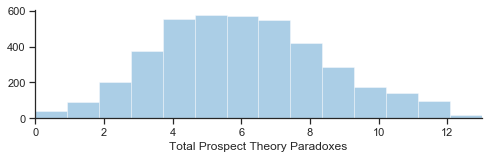

In [32]:
sns.set(font_scale=1, style="ticks")
fig, ax= plt.subplots(figsize=(8, 2))
sns.distplot(data["Total Prospect Theory Paradoxes"], bins=14, kde=False, color='#2e86c1')
ax.set(xlim=(0, 13))
sns.despine()
plt.savefig("../figures/supplement/Prospect theory congruent choices by participant.svg", bbox_extra_artists=(lgd,),
           bbox_inches="tight")

### Distribution of prospect theory paradoxes per country

In [36]:
continents = {"Europe":['Bulgaria', 'Denmark', 'Belgium', 'Ireland', 'UK','Austria', 'Germany',
       'Hungary', 'Italy', 'Norway', 'Serbia', 'Slovenia', 'Spain', 'Sweden'],
             "Asia":['Hong Kong', 'Mainland China'],
             "North America": ["USA"],
            "Oceania": ["Australia"],
             "South America":["Chile"]}

In [41]:
continents.keys()

dict_keys(['Europe', 'Asia', 'North America', 'Oceania', 'South America'])

In [38]:
new_map = {}
for continent in continents.keys():
    for country in continents[continent]:
        new_map[country] = continent

In [42]:
cont_col_dict = dict(zip(continents.keys(), sns.color_palette("hls", 7)[:5]))

In [43]:
cont_col_dict

{'Europe': (0.86, 0.3712, 0.33999999999999997),
 'Asia': (0.86, 0.8169142857142857, 0.33999999999999997),
 'North America': (0.4573714285714283, 0.86, 0.33999999999999997),
 'Oceania': (0.33999999999999997, 0.86, 0.6683428571428571),
 'South America': (0.33999999999999997, 0.6059428571428571, 0.86)}

In [44]:
paradox_palette = data.groupby("Country")["Total Prospect Theory Paradoxes"].mean().sort_values(ascending=False).index.map(new_map).map(cont_col_dict)

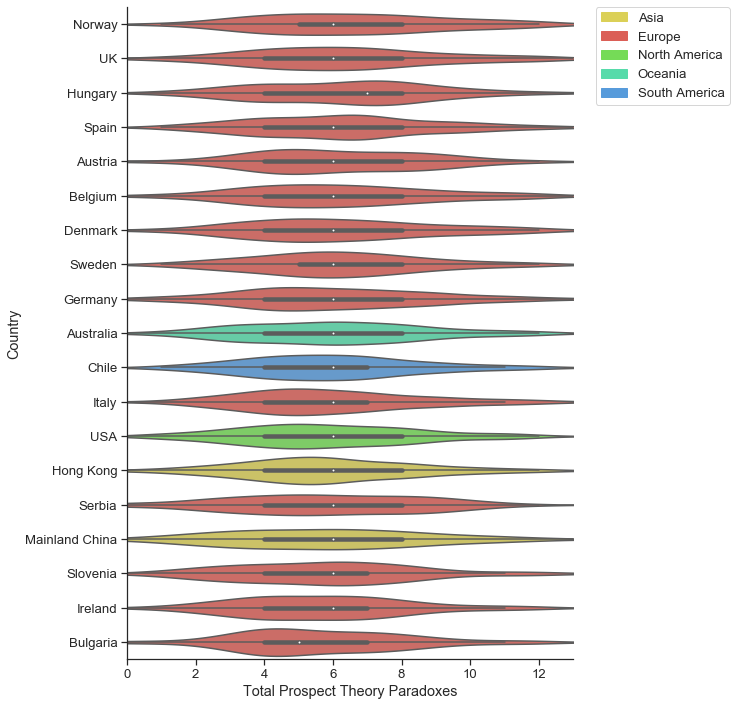

In [45]:
import matplotlib.patches as mpatches
sns.set(font_scale=1.2, style="ticks")
fig, ax= plt.subplots(figsize=(8, 12))
sns.violinplot(data=data, y="Country", x="Total Prospect Theory Paradoxes", ax = ax, order=data.groupby("Country")["Total Prospect Theory Paradoxes"].mean().sort_values(ascending=False).index, 
              palette=paradox_palette)
pooled = mpatches.Patch(color=sns.color_palette("hls", 7)[6], label='Pooled')
asia = mpatches.Patch(color=cont_col_dict["Asia"], label='Asia')
europe = mpatches.Patch(color=cont_col_dict["Europe"], label='Europe')
north_america = mpatches.Patch(color=cont_col_dict["North America"], label='North America')
oceania = mpatches.Patch(color=cont_col_dict["Oceania"], label='Oceania')
south_america = mpatches.Patch(color=cont_col_dict["South America"], label='South America')

lgd = plt.legend(handles=[asia, europe, north_america, oceania, south_america], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.despine()
ax.set(xlim=(0, 13))
plt.savefig("../figures/supplement/Prospect theory congruent choices by country.svg", bbox_extra_artists=(lgd,),
           bbox_inches="tight")

### Paradox analyses in R

In [53]:
contrast_columns_extended = np.concatenate((contrast_columns, ["Country", "Age", 'Loss_Awareness', 'Loss_Intuition']), axis=None)

In [54]:
data2 = data[contrast_columns_extended].copy()

In [55]:
data2["Loss_Intuition"] = data2["Loss_Intuition"].fillna(0)

In [57]:
%load_ext RWinOut

In [58]:
%R -i data2

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [59]:
%%R
head(data2)

  Contrast_1_2 Contrast_3_4 Contrast_7_8 Contrast_3_7 Contrast_4_8 Contrast_5_9
0            0            1            1            1            1            0
1            0            0            0            0            0            1
2            0            0            1            1            0            0
3            0            0            1            1            0            1
4            0            0            0            1            0            1
5            0            0            0            1            0            0
  Contrast_6_10 Contrast_16_17 Contrast_4_11 Contrast_5_6 Contrast_9_10
0             0              0             1            0             0
1             0              1             0            0             1
2             0              0             0            0             0
3             0              0             0            0             1
4             0              0             0            1             0
5       

### Controlling for loss aversion awareness

In [60]:
%%R
library(lme4)

In [61]:
%%R
fit = glmer(Contrast_1_2 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_1_2 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5626.1   5651.4  -2809.1   5618.1     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9740 -0.8892 -0.8412  1.1137  1.2214 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.009931 0.09966 
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.23715    0.09131  -2.597   0.0094 **
Loss_Awareness  0.07786    0.10393   0.749   0.4538   
Loss_Intuition -0.04246    0.09830  -0.432   0.6657   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.822       
Loss_Intutn -0.867  0.760


In [62]:
%%R
fit = glmer(Contrast_3_4 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_3_4 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5589.0   5614.3  -2790.5   5581.0     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9172 -0.8585 -0.8167  1.1627  1.2418 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.01106  0.1052  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.28508    0.09202  -3.098  0.00195 **
Loss_Awareness -0.02194    0.10500  -0.209  0.83448   
Loss_Intuition -0.03448    0.09857  -0.350  0.72653   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.817       
Loss_Intutn -0.864  0.758


In [63]:
%%R
fit = glmer(Contrast_7_8 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_7_8 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5425.7   5451.0  -2708.8   5417.7     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7987 -0.7746 -0.7623  1.2816  1.3441 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.004399 0.06633 
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.52131    0.09188  -5.674  1.4e-08 ***
Loss_Awareness -0.01104    0.10664  -0.104    0.918    
Loss_Intuition  0.02078    0.10061   0.207    0.836    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.837       
Loss_Intutn -0.886  0.763


In [64]:
%%R
fit = glmer(Contrast_3_7 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_3_7 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4919.5   4944.8  -2455.8   4911.5     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9360 -1.3762  0.6015  0.6538  0.7974 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.04138  0.2034  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.9188     0.1082   8.495   <2e-16 ***
Loss_Awareness  -0.1872     0.1136  -1.649   0.0992 .  
Loss_Intuition   0.1119     0.1085   1.031   0.3026    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.767       
Loss_Intutn -0.802  0.762


In [65]:
%%R
fit = glmer(Contrast_4_8 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_4_8 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4791.8   4817.0  -2391.9   4783.8     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7134 -0.6288 -0.5751  1.4350  1.9395 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.03464  0.1861  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.02510    0.10861  -9.438   <2e-16 ***
Loss_Awareness  0.11701    0.11662   1.003    0.316    
Loss_Intuition -0.01487    0.11077  -0.134    0.893    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.783       
Loss_Intutn -0.822  0.763


In [66]:
%%R
fit = glmer(Contrast_5_9 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_5_9 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4865.5   4890.8  -2428.8   4857.5     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9518 -1.1922  0.5675  0.6300  0.9446 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.09999  0.3162  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.03666    0.12433   8.338   <2e-16 ***
Loss_Awareness -0.28466    0.11680  -2.437   0.0148 *  
Loss_Intuition -0.04692    0.11169  -0.420   0.6744    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.696       
Loss_Intutn -0.727  0.770


In [67]:
%%R
fit = glmer(Contrast_6_10 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_6_10 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5432.6   5457.9  -2712.3   5424.6     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8744 -0.7942 -0.7255  1.2445  1.4916 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.02729  0.1652  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.499059   0.098472  -5.068 4.02e-07 ***
Loss_Awareness -0.048447   0.107029  -0.453    0.651    
Loss_Intuition  0.009002   0.100570   0.090    0.929    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.780       
Loss_Intutn -0.825  0.758


In [68]:
%%R
fit = glmer(Contrast_16_17 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_16_17 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5373.6   5398.9  -2682.8   5365.6     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0987 -0.8031 -0.6720  1.1967  1.6860 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.08642  0.294   
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.4416     0.1133  -3.897 9.74e-05 ***
Loss_Awareness  -0.2181     0.1080  -2.020   0.0434 *  
Loss_Intuition  -0.0216     0.1008  -0.214   0.8303    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.674       
Loss_Intutn -0.716  0.751


In [69]:
%%R
fit = glmer(Contrast_4_11 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_4_11 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5542.3   5567.6  -2767.2   5534.3     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8839 -0.8321 -0.8040  1.1849  1.2615 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.002649 0.05147 
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.28282    0.08923  -3.170  0.00153 **
Loss_Awareness -0.05062    0.10481  -0.483  0.62912   
Loss_Intuition -0.14589    0.09852  -1.481  0.13863   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.839       
Loss_Intutn -0.888  0.758


In [70]:
%%R
fit = glmer(Contrast_5_6 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_5_6 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5590.2   5615.5  -2791.1   5582.2     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2180 -1.1881  0.8210  0.8417  0.9029 

Random effects:
 Groups  Name        Variance  Std.Dev. 
 Country (Intercept) 9.711e-14 3.116e-07
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.39435    0.08907   4.427 9.54e-06 ***
Loss_Awareness -0.18997    0.10438  -1.820   0.0688 .  
Loss_Intuition -0.04964    0.09899  -0.501   0.6160    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.853       
Loss_Intutn -0.900  0.768
convergence code: 0
boundary (singular

In [71]:
%%R
fit = glmer(Contrast_9_10 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_9_10 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5612.4   5637.6  -2802.2   5604.4     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0855 -0.9088 -0.7696  1.0896  1.3361 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.0439   0.2095  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.17277    0.10099  -1.711   0.0871 .
Loss_Awareness -0.13932    0.10488  -1.328   0.1841  
Loss_Intuition -0.02649    0.09831  -0.269   0.7876  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.742       
Loss_Intutn -0.785  0.755


In [72]:
%%R
fit = glmer(Contrast_12_13 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_12_13 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5588.8   5614.1  -2790.4   5580.8     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2067 -0.8977 -0.7363  1.0595  1.3720 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.06875  0.2622  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.05493    0.10738  -0.512   0.6090  
Loss_Awareness -0.18488    0.10486  -1.763   0.0779 .
Loss_Intuition -0.19515    0.09860  -1.979   0.0478 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.699       
Loss_Intutn -0.739  0.755


In [73]:
%%R
fit = glmer(Contrast_14_15 ~ Loss_Awareness + Loss_Intuition + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_14_15 ~ Loss_Awareness + Loss_Intuition + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5626.6   5651.8  -2809.3   5618.6     4094 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1490 -0.9418 -0.7521  1.0371  1.4047 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.05745  0.2397  
Number of obs: 4098, groups:  Country, 19

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.05814    0.10448  -0.556   0.5779  
Loss_Awareness -0.20272    0.10471  -1.936   0.0529 .
Loss_Intuition -0.02859    0.09843  -0.290   0.7715  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Lss_Aw
Loss_Awrnss -0.717       
Loss_Intutn -0.760  0.755


### Controlling for age

In [76]:
%%R
fit = glmer(Contrast_1_2 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_1_2 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5525.9   5544.9  -2760.0   5519.9     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0835 -0.8783 -0.7729  1.1182  1.9076 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.08586  0.293   
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.410682   0.118600  -3.463 0.000535 ***
Age          0.003445   0.002819   1.222 0.221676    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.775


In [77]:
%%R
fit = glmer(Contrast_3_4 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_3_4 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5586.7   5605.6  -2790.3   5580.7     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9613 -0.8570 -0.8128  1.1543  1.2721 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.01177  0.1085  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.422511   0.099238  -4.258 2.07e-05 ***
Age          0.003408   0.002772   1.230    0.219    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.912
convergence code: 0
Model failed to converge with max|grad| = 0.00139814 (tol = 0.001, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?



In [78]:
%%R
fit = glmer(Contrast_7_8 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_7_8 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5425.8   5444.8  -2709.9   5419.8     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7977 -0.7741 -0.7638  1.2845  1.3445 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.004399 0.06632 
Number of obs: 4099, groups:  Country, 19

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.4914069  0.0989107  -4.968 6.76e-07 ***
Age         -0.0006685  0.0028293  -0.236    0.813    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.932
convergence code: 0
Model failed to converge with max|grad| = 0.00414125 (tol = 0.001, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?



In [79]:
%%R
fit = glmer(Contrast_3_7 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_3_7 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4912.6   4931.5  -2453.3   4906.6     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4368 -1.3502  0.5908  0.6681  0.8398 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.0513   0.2265  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.454534   0.119622    3.80 0.000145 ***
Age         0.014293   0.003197    4.47 7.81e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.848
convergence code: 0
Model failed to converge with max|grad| = 0.00236066 (tol = 0.001, component 1)



In [80]:
%%R
fit = glmer(Contrast_4_8 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_4_8 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4791.1   4810.1  -2392.6   4785.1     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7180 -0.6303 -0.5802  1.4620  2.0431 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.03778  0.1944  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.846900   0.116861  -7.247 4.26e-13 ***
Age         -0.004521   0.003150  -1.435    0.151    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.870


In [81]:
%%R
fit = glmer(Contrast_5_9 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_5_9 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  4875.2   4894.2  -2434.6   4869.2     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8733 -1.1364  0.5731  0.5975  0.8961 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.1127   0.3358  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.8996001  0.1317010   6.831 8.45e-12 ***
Age         0.0004249  0.0030868   0.138    0.891    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.763
convergence code: 0
Model failed to converge with max|grad| = 0.00153597 (tol = 0.001, component 1)



In [82]:
%%R
fit = glmer(Contrast_6_10 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_6_10 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5418.5   5437.4  -2706.2   5412.5     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9390 -0.7983 -0.7130  1.2129  1.6918 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.02778  0.1667  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.164116   0.106480  -1.541 0.123249    
Age         -0.010706   0.002908  -3.682 0.000232 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.879
convergence code: 0
Model failed to converge with max|grad| = 0.00391553 (tol = 0.001, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?



In [83]:
%%R
fit = glmer(Contrast_16_17 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_16_17 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5309.5   5328.5  -2651.8   5303.5     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2891 -0.7933 -0.6309  1.1260  2.6110 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.09098  0.3016  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.284388   0.124287   2.288   0.0221 *  
Age         -0.025257   0.003084  -8.191  2.6e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.783
convergence code: 0
Model failed to converge with max|grad| = 0.00102596 (tol = 0.001, component 1)



In [84]:
%%R
fit = glmer(Contrast_4_11 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_4_11 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5541.8   5560.8  -2767.9   5535.8     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9352 -0.8261 -0.8053  1.2015  1.2840 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.00427  0.06535 
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.526608   0.097506  -5.401 6.63e-08 ***
Age          0.004531   0.002776   1.632    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.932
convergence code: 0
Model failed to converge with max|grad| = 0.00228417 (tol = 0.001, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?



In [85]:
%%R
fit = glmer(Contrast_5_6 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_5_6 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5577.6   5596.6  -2785.8   5571.6     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2664 -1.1616  0.8081  0.8461  1.0964 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0        0       
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.679575   0.095434   7.121 1.07e-12 ***
Age         -0.011515   0.002749  -4.189 2.81e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.943
convergence code: 0
singular fit



In [86]:
%%R
fit = glmer(Contrast_9_10 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_9_10 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5614.4   5633.4  -2804.2   5608.4     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0787 -0.9044 -0.7816  1.0919  1.3368 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.04746  0.2179  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.160418   0.108524  -1.478    0.139
Age         -0.002245   0.002785  -0.806    0.420

Correlation of Fixed Effects:
    (Intr)
Age -0.835
convergence code: 0
Model failed to converge with max|grad| = 0.00142639 (tol = 0.001, component 1)



In [87]:
%%R
fit = glmer(Contrast_12_13 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_12_13 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5565.9   5584.9  -2780.0   5559.9     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3784 -0.8898 -0.7275  1.0773  1.5035 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.0657   0.2563  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.684528   0.113532  -6.029 1.65e-09 ***
Age          0.014173   0.002795   5.070 3.97e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.805


In [88]:
%%R
fit = glmer(Contrast_14_15 ~ Age + (1|Country), data=data2, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Contrast_14_15 ~ Age + (1 | Country)
   Data: data2

     AIC      BIC   logLik deviance df.resid 
  5619.8   5638.8  -2806.9   5613.8     4096 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1790 -0.9434 -0.7464  1.0270  1.5050 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.05658  0.2379  
Number of obs: 4099, groups:  Country, 19

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.186947   0.111019   1.684 0.092197 .  
Age         -0.010117   0.002806  -3.605 0.000312 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Age -0.820
convergence code: 0
Model failed to converge with max|grad| = 0.00260459 (tol = 0.001, component 1)



# Order effect analyses

## Preparing Order Data Set

In [80]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', 'Gender', 'Age', 'Personal_Income',
       'Financial_Situation', 'Bill_Payments', 'Education', 'Credit_Debt',
       'Additional_Income_Private_Investment', 'Additional_Income_Property',
       'Additional_Income_Business_Ownership',
       'Additional_Income_Retirement_Plan', 'Loss_Awareness', 'Loss_Intuition',
       'Country', 'Duration_in_seconds', 'Language', 'Sample',
       'Duration_Minutes', 'YoB', 'Awareness_of_Loss_Aversion',
       'Financial_Stress', 'Presentation_Order', 'Contrast_1_2',
       'Contrast_3_4', 'Contrast_7_8', 'Contrast_3_7', 'Contrast_4_8',
       'Contrast_5_9', 'Contrast_6_10', 'Contrast_16_17', 'Contrast_4_11',
       'Contrast_5_6', 'Contrast_9_10', 'Contrast_12_13', 'Contrast_14_15',
       'Total Prospect Theory Paradoxes', 'ResponseID'],
      dtype='object')

In [78]:
data["ResponseID"] = data.index.values

In [81]:
%%time
order_data = data.melt(value_vars=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17'], id_vars=['ResponseID', 'Country', 'Sample'], value_name="Response", var_name="Question")
order_data["Order"] = np.nan
for rid in data["ResponseID"]:
    order_list = data.loc[data["ResponseID"]==rid, 'Presentation_Order'].values[0].split("|")
    order_list.remove("18")
    question_to_order = dict(zip(order_list, [str(x) for x in np.arange(1, 18)]))
    order_data.loc[order_data["ResponseID"]==rid, "Order"] = order_data.loc[order_data["ResponseID"]==rid, "Question"].map(question_to_order)

Wall time: 14.7 s


### Checking that the code worked

In [83]:
data.loc[data["ResponseID"]==0, 'Presentation_Order']

0    4|6|2|3|17|18|14|8|7|15|1|12|11|5|13|16|9|10
Name: Presentation_Order, dtype: object

In [84]:
order_data["Order"] = order_data["Order"].astype(float) 

In [86]:
order_data["Question"] = order_data["Question"].astype(int)  

In [85]:
order_data.loc[order_data["ResponseID"]==0, :].sort_values(by="Order")

,ResponseID,Country,Sample,Question,Response,Order
12294,0,Bulgaria,Direct,4,1.0,1.0
20490,0,Bulgaria,Direct,6,1.0,2.0
4098,0,Bulgaria,Direct,2,0.0,3.0
8196,0,Bulgaria,Direct,3,0.0,4.0
65568,0,Bulgaria,Direct,17,0.0,5.0
53274,0,Bulgaria,Direct,14,0.0,6.0
28686,0,Bulgaria,Direct,8,0.0,7.0
24588,0,Bulgaria,Direct,7,1.0,8.0
57372,0,Bulgaria,Direct,15,0.0,9.0
0,0,Bulgaria,Direct,1,1.0,10.0


## Drawing the figure

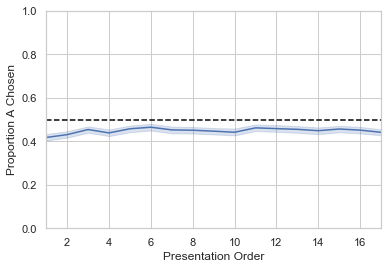

In [87]:
sns.set(font_scale=1, style="whitegrid")
fig, ax = plt.subplots()
sns.lineplot(x="Order", y="Response", data=order_data)
ax.axhline(ls='--', c="black", y=0.5)
ax.set(ylim=(0, 1), xlim=(1, 17), ylabel="Proportion A Chosen", xlabel="Presentation Order"),
plt.savefig('../figures/supplement/Order Effects.svg', bbox_inches="tight")

In [88]:
order_data["Response"].mean()

0.4488443137933022

## Hierarchical Model Estimating Order Effects in R

In [90]:
%%R
library(optimx)

In [91]:
%R -i order_data

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [93]:
%%R
order_data$Question = factor(order_data$Question)
order_data$Country = factor(order_data$Country)
order_data$ResponseID = factor(order_data$ResponseID)

In [94]:
%%R
fit = glmer(Response ~ Order + Question + (1|Country/ResponseID), data = order_data, family="binomial", control = glmerControl(
                 optimizer ='optimx', optCtrl=list(method='L-BFGS-B')))
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Response ~ Order + Question + (1 | Country/ResponseID)
   Data: order_data
Control: 
glmerControl(optimizer = "optimx", optCtrl = list(method = "L-BFGS-B"))

     AIC      BIC   logLik deviance df.resid 
 79523.5  79706.4 -39741.7  79483.5    69376 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6853 -0.7154 -0.3267  0.7533  4.5927 

Random effects:
 Groups             Name        Variance Std.Dev.
 ResponseID:Country (Intercept) 0.27631  0.5257  
 Country            (Intercept) 0.01508  0.1228  
Number of obs: 69396, groups:  ResponseID:Country, 4098; Country, 19

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.2051541  0.0503981 -23.913  < 2e-16 ***
Order        0.0059341  0.0017959   3.304 0.000952 ***
Question2    1.6611804  0.0497376  33.399  < 2e-16 ***
Question3   -0.8729173  0.0600352 -14.540  <

# Comparing direct and paid respondents

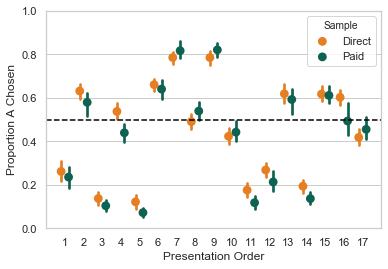

In [96]:
sns.set(font_scale=1, style="whitegrid")
fig, ax = plt.subplots()
sns.pointplot(x="Question", y="Response", hue="Sample", units="Country", dodge=0.4, join=False, data=order_data, 
              palette=["#e67e22", "#0E6251"])
ax.axhline(ls='--', c="black", y=0.5)
ax.set(ylim=(0, 1), xlim=(-1, 17), ylabel="Proportion A Chosen", xlabel="Presentation Order"),
plt.savefig('../figures/supplement/Global Sample Comparison.svg', bbox_inches="tight")

In [98]:
%%R
fit = glmer(Response ~ Sample + Question + Sample:Question + (1|Country/ResponseID), data = order_data, family="binomial", control = glmerControl(
                 optimizer ='optimx', optCtrl=list(method='L-BFGS-B')))
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
Response ~ Sample + Question + Sample:Question + (1 | Country/ResponseID)
   Data: order_data
Control: 
glmerControl(optimizer = "optimx", optCtrl = list(method = "L-BFGS-B"))

     AIC      BIC   logLik deviance df.resid 
 79406.3  79735.6 -39667.2  79334.3    69360 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6027 -0.7174 -0.3215  0.7485  5.3219 

Random effects:
 Groups             Name        Variance Std.Dev.
 ResponseID:Country (Intercept) 0.2772   0.5265  
 Country            (Intercept) 0.0126   0.1122  
Number of obs: 69396, groups:  ResponseID:Country, 4098; Country, 19

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.11980    0.05120 -21.872  < 2e-16 ***
SamplePaid            -0.10397    0.08995  -1.156  0.24775    
Question2              1.68051    0.05796  28.992  < 2e

# Preparing the demographics table

In [99]:
data["Female"] = (data["Gender"]=="Female").astype(int)
demo_table = pd.DataFrame(((data.groupby("Country")["Female"].sum()/data.groupby("Country")["Female"].count()) * 100).round(2))
demo_table.columns = ["% Female"]

In [100]:
demo_table["Age Median"] = data.groupby("Country")["Age"].median()
demo_table["Age 2nd Quartile"] = data.groupby("Country")["Age"].quantile(0.25)
demo_table["Age 3rd Quartile"] = data.groupby("Country")["Age"].quantile(0.75)

In [102]:
demo_table["Income Median"] = data.groupby("Country")["Personal_Income"].median()
demo_table["Income 2nd Quartile"] = data.groupby("Country")["Personal_Income"].quantile(0.25)
demo_table["Income 3rd Quartile"] = data.groupby("Country")["Personal_Income"].quantile(0.75)

In [103]:
data["Education"].unique()

[University Undergraduate, University Masters, University PhD, Secondary school, Vocational school, University MBA, Primary school, NaN]
Categories (7, object): [Primary school < Secondary school < Vocational school < University Undergraduate < University Masters < University MBA < University PhD]

In [104]:
data["University"] = data["Education"].isin(["University Undergraduate", "University Masters", "University MBA", "University PhD"]).astype(int)
demo_table["% University Educated"] = pd.DataFrame(((data.groupby("Country")["University"].sum()/data.groupby("Country")["University"].count()) * 100).round(2))

In [105]:
demo_table["N"] = data["Country"].value_counts()

In [106]:
data["Paid"] = (data["Sample"]=="Paid").astype(int)
demo_table["% Paid"] = pd.DataFrame(((data.groupby("Country")["Paid"].sum()/data.groupby("Country")["Paid"].count()) * 100).round(2))

In [107]:
demo_table

,% Female,Age Median,Age 2nd Quartile,Age 3rd Quartile,Income Median,Income 2nd Quartile,Income 3rd Quartile,% University Educated,N,% Paid
Country,,,,,,,,,,
Australia,35.11,31.0,26.25,37.00,60000.0,33000.00,90000.0,77.30,282,0.00
Austria,45.95,28.0,23.50,36.00,18000.0,7150.00,30000.0,53.15,111,36.94
Belgium,47.40,27.0,23.00,38.25,15000.0,1970.00,25000.0,64.58,192,33.85
Bulgaria,61.42,33.0,26.00,41.50,15000.0,7000.00,25100.0,81.89,127,22.83
Chile,51.03,27.0,24.00,36.00,2700000.0,260000.00,12000000.0,64.14,145,38.62
Denmark,33.33,32.0,26.00,40.00,250000.0,126750.00,320000.0,72.67,150,19.33
Germany,39.14,27.0,24.00,33.00,16000.0,5400.00,33000.0,66.67,327,43.12
Hong Kong,63.75,30.0,24.00,43.00,200000.0,30000.00,425000.0,70.62,160,0.00
Hungary,43.21,29.0,24.00,34.50,2000000.0,405000.00,3922536.0,60.08,243,58.44


In [109]:
demo_table.to_excel("../output/demographic_table.xlsx")
demo_table.to_csv("../output/demographic_table.csv")

In [110]:
data["Paid"].value_counts(normalize=True).round(4)*100

0    73.89
1    26.11
Name: Paid, dtype: float64

In [111]:
data["Female"].value_counts(normalize=True).round(4)*100

1    50.68
0    49.32
Name: Female, dtype: float64

In [112]:
data["Age"].median()

29.0

In [113]:
data["Age"].quantile(0.25)

24.0

In [114]:
data["Age"].quantile(0.75)

38.0

In [115]:
data["University"].value_counts(normalize=True).round(4)*100

1    66.94
0    33.06
Name: University, dtype: float64